In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
from keras.layers import Dropout
from keras.constraints import maxnorm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('cardio_train.csv', sep=";")
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
df['age'] = df['age'] / 365.0
df['height'] = df['height'] / 100
df['BMI'] = df['weight'] / (df['height'] * df['height'])

In [4]:
df.drop('cholesterol', axis = 1, inplace = True)
df.drop('gluc', axis = 1, inplace = True)

In [5]:
target = df['cardio']
data = df.drop('cardio', axis = 1)
data.drop('id', axis = 1, inplace = True)

In [6]:
columns = data.columns

mm_scaler = preprocessing.MinMaxScaler()
data = mm_scaler.fit_transform(data)
data =pd.DataFrame(data, columns=columns)
data.head(3)

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,BMI
0,0.588076,1.0,0.579487,0.273684,0.016079,0.013550,0.0,0.0,1.0,0.062655
1,0.730159,0.0,0.517949,0.394737,0.017934,0.014453,0.0,0.0,1.0,0.106560
2,0.624003,0.0,0.564103,0.284211,0.017316,0.012647,0.0,0.0,0.0,0.067874


In [6]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, shuffle=True)

In [7]:
print(tf.__version__)

2.4.1


In [10]:
model = Sequential()
model.add(Dense(25, input_dim=10, activation='softsign', kernel_constraint=maxnorm(2)))
#model.add(Dropout(0))
model.add(Dense(5, activation='softsign'))
#model.add(Dropout(0))
model.add(Dense(3, activation='softsign'))
#model.add(Dropout(0))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer='Nadam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 25)                275       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 130       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 18        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 4         
Total params: 427
Trainable params: 427
Non-trainable params: 0
_________________________________________________________________


In [13]:
history = model.fit(X_train, y_train, epochs=15, batch_size=10)

Epoch 1/15
5600/5600 [==============================] - 11s 2ms/step - loss: 0.6672 - accuracy: 0.5879
Epoch 2/15
5600/5600 [==============================] - 11s 2ms/step - loss: 0.6353 - accuracy: 0.6382
Epoch 3/15
5600/5600 [==============================] - 11s 2ms/step - loss: 0.6188 - accuracy: 0.6574
Epoch 4/15
5600/5600 [==============================] - 11s 2ms/step - loss: 0.5973 - accuracy: 0.6786
Epoch 5/15
5600/5600 [==============================] - 11s 2ms/step - loss: 0.5812 - accuracy: 0.6965
Epoch 6/15
5600/5600 [==============================] - 11s 2ms/step - loss: 0.5797 - accuracy: 0.7005
Epoch 7/15
5600/5600 [==============================] - 11s 2ms/step - loss: 0.5706 - accuracy: 0.7064
Epoch 8/15
5600/5600 [==============================] - 12s 2ms/step - loss: 0.5711 - accuracy: 0.7073
Epoch 9/15
5600/5600 [==============================] - 12s 2ms/step - loss: 0.5748 - accuracy: 0.7058
Epoch 10/15
5600/5600 [==============================] - 11s 2ms/step - l

dict_keys(['loss', 'accuracy'])


KeyError: 'val_accuracy'

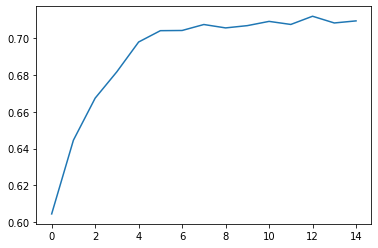

In [14]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
model.save('model_final.h5')

In [18]:
model = tf.keras.models.load_model('model_final.h5')

In [19]:
predictions = model.predict(X_test)
score = predictions[1]
print(
    "This image is %.2f percent cat and %.2f percent dog."
    % (100 * (1 - score), 100 * score)
)

This image is 83.73 percent cat and 16.27 percent dog.


In [20]:
predictions

array([[0.17872326],
       [0.1626786 ],
       [0.3975768 ],
       ...,
       [0.57099396],
       [0.35653946],
       [0.65831953]], dtype=float32)